### Problem-1

#### Take the Gapminder Test: http://forms.gapminder.org/s3/test-2018.

 #### What score did you receive? Did any of the answers surprise you? Choose a question from the test, re-state it, and answer it using visualization and summarization. Provide a ﬁgure and any relevant output with your answer.


I received 46% in the gapminder test. I was a little suprised to see the current average life expectancy. 
How do you think has the average world life expectancy changed overtime?

Dataset used: ddf--datapoints--life_expectancy_years--by--geo--time.csv

In [20]:
import pandas as pd
df =pd.read_csv("C:/Users/devan/Downloads/ddf--gapminder--systema_globalis-master/ddf--gapminder--systema_globalis-master/ddf--datapoints--life_expectancy_years--by--geo--time.csv")

In [21]:
df.head()

geo  time  life_expectancy_years
0  abw  1800                  34.42
1  abw  1801                  34.42
2  abw  1802                  34.42
3  abw  1803                  34.42
4  abw  1804                  34.42

In [22]:
y=df.groupby(['time'])['life_expectancy_years'].mean().reset_index()

In [23]:
y=pd.DataFrame(y)

In [24]:
y.head()

time  life_expectancy_years
0  1800              31.486020
1  1801              31.448905
2  1802              31.463483
3  1803              31.377413
4  1804              31.446318

Text(0.5, 1.0, 'Average Life Expectancy over Time')

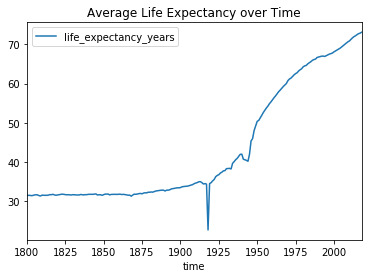

In [48]:
from matplotlib import pyplot as plt
y.plot(kind='line',x='time',y='life_expectancy_years')
plt.title("Average Life Expectancy over Time")

*The visualization makes it a little easier to understand the average world life expectancy over the years and it's easier to point out the current life expectancy now to be around 70 years which I underestimated a little, but it does really make sense and can be attributed to the advance in medicine,economic growth and general upgrade of lifestyle.* 

### Problem-2

Visualize the distribution of income (GDP / capita) across countries and continents, and how the distribution of income changes over time. 
Interpret the visualization and what you notice. Are they any notable trends and/or deviations from that trend? What caveats apply to your conclusions?


Dataset used: ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
from os import listdir
import plotly.graph_objects as go
import plotly.express as px



df_gdp = pd.read_csv('C:/Users/devan/Downloads/ddf--gapminder--systema_globalis-master/ddf--gapminder--systema_globalis-master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv').rename(columns={'income_per_person_gdppercapita_ppp_inflation_adjusted':'gdp_income'})
df_gdp['geo']=df_gdp['geo'].astype(str).str.upper()
df_gdp['time']=df_gdp['time'].astype(str)
df_gdp.sort_values(by=['time'],inplace=True)
fig = px.choropleth(df_gdp, locations="geo",color="gdp_income", hover_name="geo",animation_frame='time', range_color=[0,69000])
fig.show()

#### Interpret the visualization and what you notice. Are they any notable trends and/or deviations from that trend? What caveats apply to your conclusions?


The GDP of all countries has linearly increased with time. America, Australia and Europe have a higher GDP per capita since early years probably due to lower population and industrializatio, while there is a gradual increase in south asian countries and middle-eastern regions. There are certain parts in africa that are still a little below the average.

### Problem-3

#### Use visualization to investigate the relationship between income (GDP / capita), life expectancy, and child mortality over time. How does each measure change over time within each continent? Interpret your visualizations, noting any trends and/or outliers.


Data-sets used: ddf--datapoints--life_expectancy_years--by--geo--time.csv,
ddf--datapoints--child_mortality_0_5_year_olds_dying_per_1000_born--by--geo--time.csv,
ddf--entities--geo--country.csv'

In [15]:
print(sns.__version__) 

0.9.0


In [54]:
import pandas as pd
df_life_expectancy = pd.read_csv('C:/Users/devan/Downloads/ddf--gapminder--systema_globalis-master/ddf--gapminder--systema_globalis-master/ddf--datapoints--life_expectancy_years--by--geo--time.csv')
df_child_mortality = pd.read_csv('C:/Users/devan/Downloads/ddf--gapminder--systema_globalis-master/ddf--gapminder--systema_globalis-master/ddf--datapoints--child_mortality_0_5_year_olds_dying_per_1000_born--by--geo--time.csv')
df_country = pd.read_csv('C:/Users/devan/Downloads/ddf--gapminder--systema_globalis-master/ddf--gapminder--systema_globalis-master/ddf--entities--geo--country.csv')[['country', 'world_4region']]
df_gdp = pd.read_csv('C:/Users/devan/Downloads/ddf--gapminder--systema_globalis-master/ddf--gapminder--systema_globalis-master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv').rename(columns={'income_per_person_gdppercapita_ppp_inflation_adjusted':'gdp_income'})
merged_df = pd.merge(df_child_mortality, df_life_expectancy, on = ['geo', 'time']) 
merged_df = pd.merge(merged_df, df_country, left_on = 'geo', right_on='country')
merged_df = pd.merge(merged_df, df_gdp, on = ['geo', 'time'])
world_regions = merged_df.groupby(['world_4region', 'time']).mean().reset_index()

merged_df.head()

geo  time  child_mortality_0_5_year_olds_dying_per_1000_born  \
0  afg  1800                                             468.58   
1  afg  1801                                             468.58   
2  afg  1802                                             468.58   
3  afg  1803                                             468.58   
4  afg  1804                                             468.58   

   life_expectancy_years country world_4region  gdp_income  
0                  28.21     afg          asia         603  
1                  28.20     afg          asia         603  
2                  28.19     afg          asia         603  
3                  28.18     afg          asia         603  
4                  28.17     afg          asia         603

Text(0.5, 1.0, 'Life Expectancy within each continent over time')

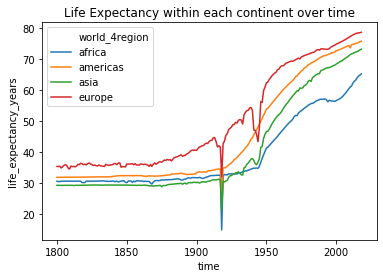

In [55]:
sns.lineplot(y='life_expectancy_years', x= 'time', hue='world_4region', hue_order=np.unique(world_regions['world_4region']), data=continents)
plt.title('Life Expectancy within each continent over time')

*Life expectancy remains almost increases with time for all continents except for the sharp glitches in almost all continents around 1920s and 1950s which might be because of wars, natural disasters or spread of epidemic.Europe seems to have the highest life extpectance otherwise*

Text(0.5, 1.0, 'Child Mortality within each continent over time')

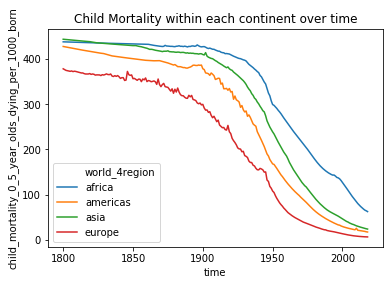

In [56]:
colors = np.unique(continents['world_4region'])
sns.lineplot(y='child_mortality_0_5_year_olds_dying_per_1000_born', x= 'time', hue='world_4region', hue_order=colors, data=world_regions)
plt.title('Child Mortality within each continent over time')

*A smooth decrease in child mortality over time for almost all continents.Africa having the heighest child mortality and Europe having the lowest child mortality.*

Text(0.5, 1.0, 'Distribution of income within each continent over time')

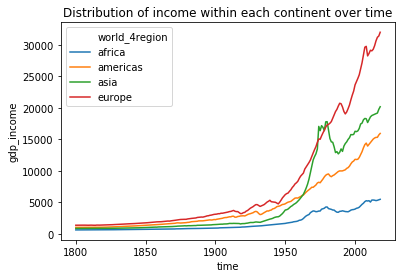

In [57]:
sns.lineplot(y='gdp_income', x= 'time', hue='world_4region', hue_order=colors, data=world_regions)
plt.title('Distribution of income within each continent over time')

*Increase in the gdp with time except for some irregularities for asia around 1960s, Europe having almost the heighest gdp at all times.*

### Problem-4

Choose two variables you have not investigated yet, and visualize their distributions, their relationship with each other, and how these change over time. Interpret your visualizations, noting any trends and/or outliers.


I was interested in looking at how gender affects the literacy rate all over the world. The idea of average male literacy rate being greater than average female literacy rate was pretty intuitive to me, but I was more interested in investigating the 2 variables from a global perspective and visualizing answers to questions like how did they vary over time, how big was the gap and did it ever close.    

In [39]:
df1 =pd.read_csv("C:/Users/devan/Downloads/ddf--gapminder--systema_globalis-master/ddf--gapminder--systema_globalis-master/ddf--datapoints--literacy_rate_adult_female_percent_of_females_ages_15_above--by--geo--time.csv")
df2 = pd.read_csv("C:/Users/devan/Downloads/ddf--gapminder--systema_globalis-master/ddf--gapminder--systema_globalis-master/ddf--datapoints--literacy_rate_adult_male_percent_of_males_ages_15_and_above--by--geo--time.csv")

df = df1.merge(df2, on=["geo", "time"])
df.head()

geo  time  literacy_rate_adult_female_percent_of_females_ages_15_above  \
0  abw  2000                                             97.070             
1  abw  2010                                             96.720             
2  afg  1979                                              4.987             
3  ago  2001                                             54.190             
4  ago  2011                                             58.610             

   literacy_rate_adult_male_percent_of_males_ages_15_and_above  
0                                              97.54            
1                                              96.94            
2                                              30.31            
3                                              82.92            
4                                              82.60

In [40]:
y1=df.groupby(['time'])['literacy_rate_adult_female_percent_of_females_ages_15_above'].mean().reset_index()

In [41]:
y1.head()

time  literacy_rate_adult_female_percent_of_females_ages_15_above
0  1975                                          39.520500          
1  1976                                          40.897857          
2  1977                                          82.180000          
3  1978                                          62.410000          
4  1979                                          30.446286

In [42]:
y2 = df.groupby(['time'])['literacy_rate_adult_male_percent_of_males_ages_15_and_above'].mean().reset_index()

In [43]:
y2.head()

time  literacy_rate_adult_male_percent_of_males_ages_15_and_above
0  1975                                          56.905000          
1  1976                                          57.545714          
2  1977                                          82.400000          
3  1978                                          75.050000          
4  1979                                          50.187143

In [44]:
final_df = y1.merge(y2,on=['time'])

In [45]:
final_df.head()

time  literacy_rate_adult_female_percent_of_females_ages_15_above  \
0  1975                                          39.520500             
1  1976                                          40.897857             
2  1977                                          82.180000             
3  1978                                          62.410000             
4  1979                                          30.446286             

   literacy_rate_adult_male_percent_of_males_ages_15_and_above  
0                                          56.905000            
1                                          57.545714            
2                                          82.400000            
3                                          75.050000            
4                                          50.187143

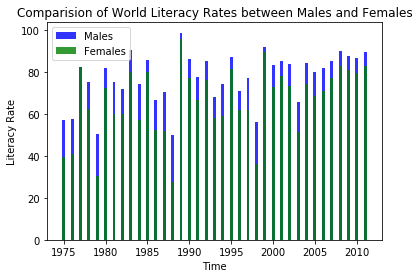

In [46]:
plt.bar(final_df['time'],final_df['literacy_rate_adult_male_percent_of_males_ages_15_and_above'],0.35,align='center',alpha=0.8,
color='b', label='Males')
plt.bar(final_df['time'],final_df['literacy_rate_adult_female_percent_of_females_ages_15_above'],0.35, align='center',alpha=0.8,
color='g',label='Females')
#plt.xticks(y_pos, objects)
plt.ylabel('Literacy Rate')
plt.xlabel('Time')
plt.title('Comparision of World Literacy Rates between Males and Females')
plt.legend()
plt.show()

*It was pretty surprising to see the gap almost close at 1977!I'd expect a linear decrease in the literacy gap, but there seems to be quite a lot of irregularities in graph.For example, the average literacy rate in 1989 is higher than 2011 which seems a little odd.*  

### Problem-5

#### Did you use static or interactive plots to answer the previous problems?

I have used both static and interactive plots to answer all the problems.

#### Discuss the advantages, disadvantages, and relative usefulness of using interactive/dynamic visualizations versus static visualizations.

I think both of them are great to tell the statistical story, however both share some advantages/disadvantages over others.
While static visualizations could be an easy use for simple data- the motive is clear and it promotes better understanding, they fail to capture multi attributes in complex data. Dynamic/interactive plots can come in handy when the data is complex and we need more than 3 variables to properly communicate the results. Sometimes, interactive plots can also be a cause of confusion. It sure does capture a lot of ideas, but might complicate the entire usecase. Often times it is also important to recognize the target audience. Interactive plots are a lot engaging and come in really attractive if they are put up on websites and might actually help in increasing session-lengths, while static plots can become dull otherwise.